### Bag-of-Words

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 21.5 MB/s eta 0:00:00


In [2]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [3]:
# Данные для примера
documents = [
    "кошка сидит на ковре кошка",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре кошка
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [4]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре', 'кошка'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [5]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [6]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [7]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

Bag-of-Words векторы (индекс_слова: частота):
Документ 1: [(0, 1), (1, 2), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]


```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [8]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

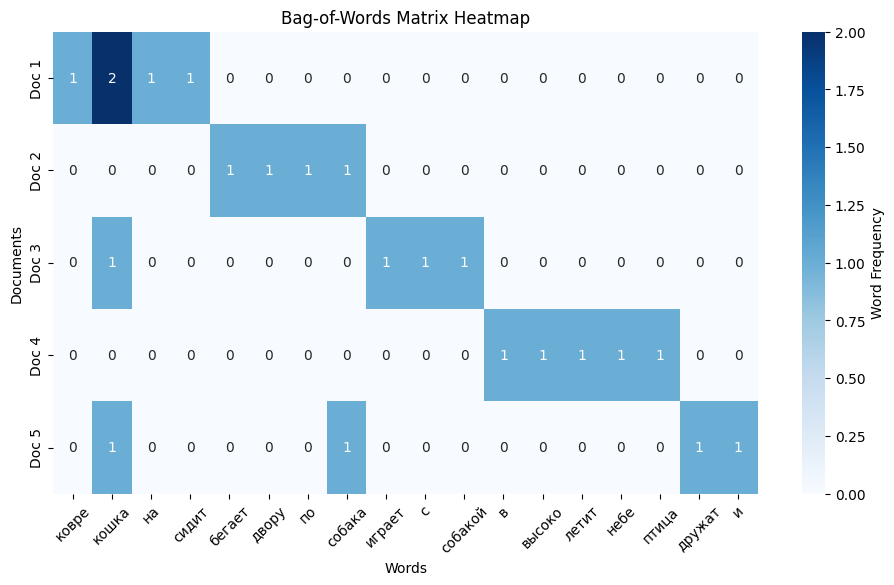

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [10]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

TF-IDF векторы (индекс_слова: tfidf_вес):
Документ 1: [('ковре', np.float64(0.542)), ('кошка', np.float64(0.344)), ('на', np.float64(0.542)), ('сидит', np.float64(0.542))]
Документ 2: [('бегает', np.float64(0.548)), ('двору', np.float64(0.548)), ('по', np.float64(0.548)), ('собака', np.float64(0.312))]
Документ 3: [('кошка', np.float64(0.18)), ('играет', np.float64(0.568)), ('с', np.float64(0.568)), ('собакой', np.float64(0.568))]
Документ 4: [('в', np.float64(0.447)), ('высоко', np.float64(0.447)), ('летит', np.float64(0.447)), ('небе', np.float64(0.447)), ('птица', np.float64(0.447))]
Документ 5: [('кошка', np.float64(0.204)), ('собака', np.float64(0.366)), ('дружат', np.float64(0.642)), ('и', np.float64(0.642))]


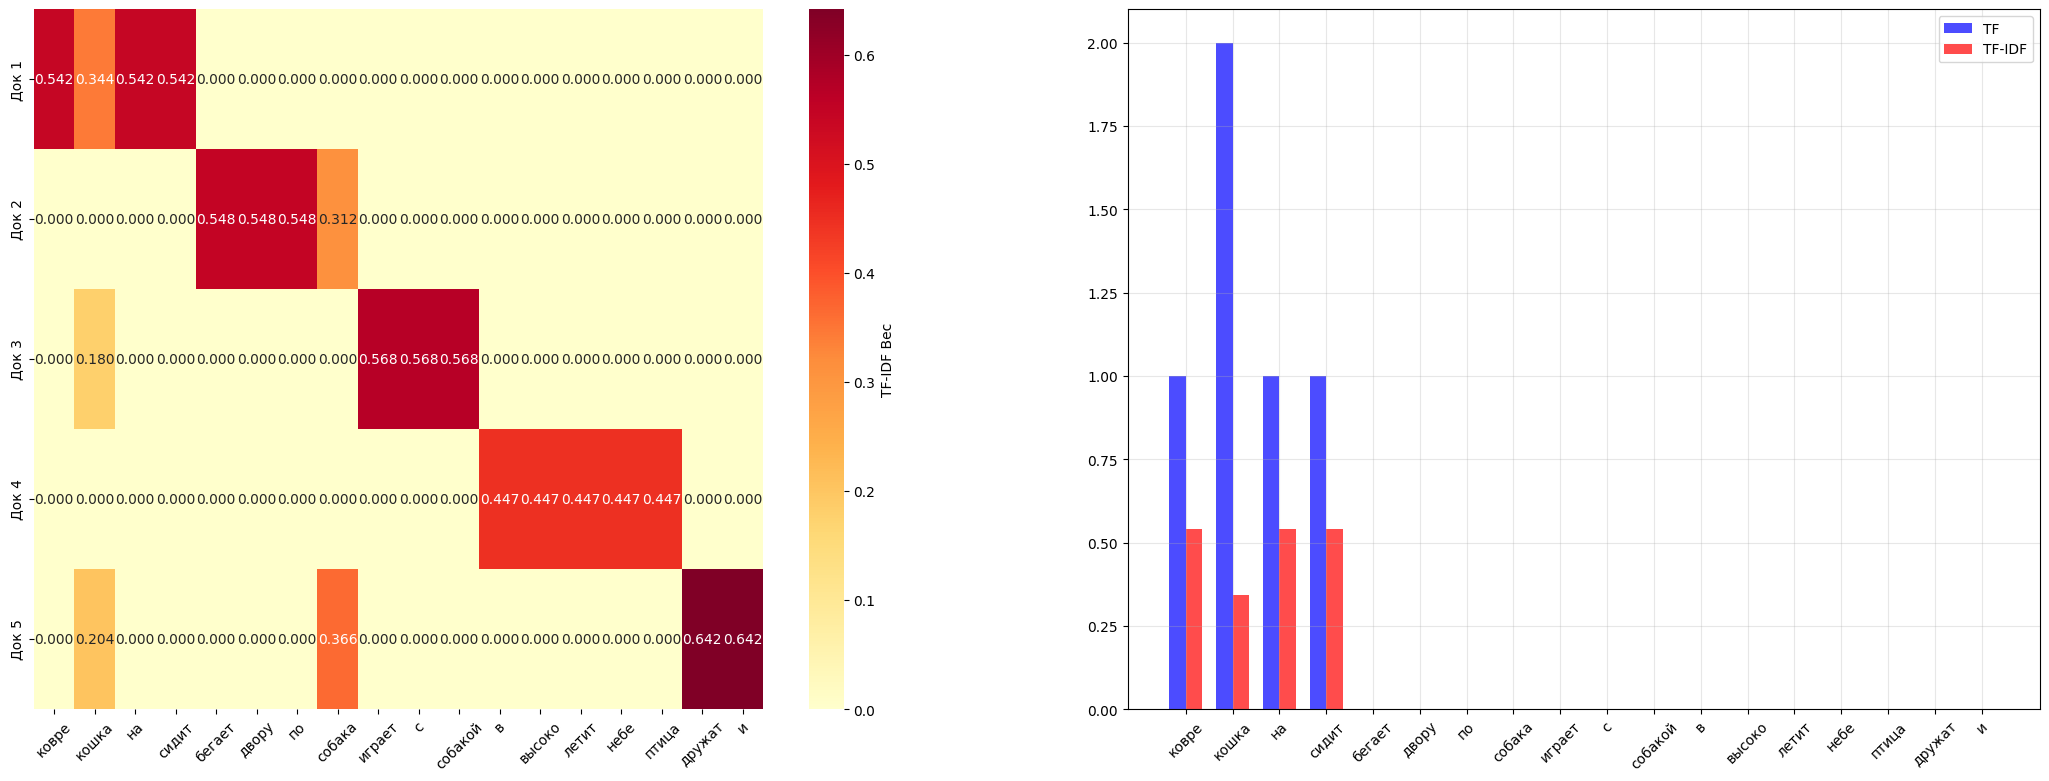

In [11]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [12]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...
[==================================================] 100.0% 66.0/66.0MB downloaded

Документ 1: кошка сидит на ковре кошка
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2  

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [15]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-12-04 20:41:25--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.008s  

2025-12-04 20:41:25 (11.8 MB/s) - ‘test.csv.1’ saved [102826/102826]



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import corpora
from gensim.models import TfidfModel
import string
from pprint import pprint

2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [17]:
df = pd.read_csv('test.csv')
print(f"Размер датасета: {df.shape}")
print(f"Колонки: {df.columns.tolist()}")
print("\nПервые 5 строк:")
print(df.head())

Размер датасета: (870, 3)
Колонки: ['text', 'label', 'source']

Первые 5 строк:
                                                text     label         source
0  Trying to have a conversation with my dad abou...  negative  sem_eval_2017
1  #latestnews 4 #newmexico #politics + #nativeam...   neutral  sem_eval_2017
2  @user You are a stand up guy and a Gentleman V...  positive  sem_eval_2017
3  @user @user @user Looks like Flynn isn't too p...  negative  sem_eval_2017
4  perfect pussy clips #vanessa hudgens zac efron...   neutral  sem_eval_2017


3. Извлечь столбец с текстами (макс. балл == 1)

In [18]:
texts = df['text'].tolist()
print(f"Количество документов: {len(texts)}")
print(f"Пример текста: {texts[0]}")

Количество документов: 870
Пример текста: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman 


4. Построить Bag-of-Words (макс. балл == 3)

Пример предобработанного текста:
['trying', 'to', 'have', 'a', 'conversation', 'with', 'my', 'dad', 'about', 'vegetarianism', 'is', 'the', 'most', 'pointless', 'infuriating', 'thing', 'ever', 'caveman']

Размер словаря: 4161
Первые 10 слов словаря:
['a', 'about', 'caveman', 'conversation', 'dad', 'ever', 'have', 'infuriating', 'is', 'most']

BoW корпус создан. Количество документов: 870
Пример BoW вектора для первого документа:
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]
Топ-10 самых частых слов:
     word  frequency
38   user        570
12    the        385
14     to        267
0       a        225
25     of        199
8      is        186
80    for        176
116    in        164
30    and        163
67      i        133


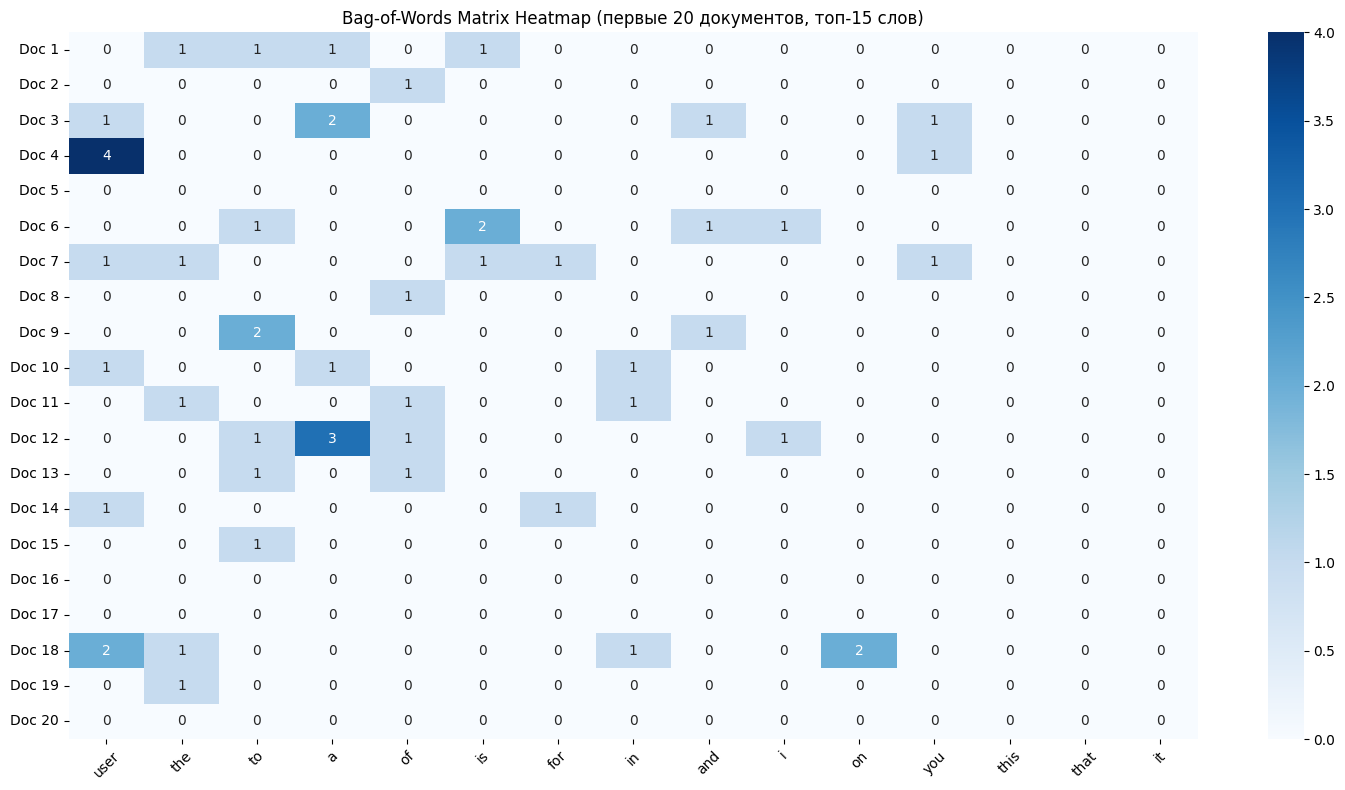

In [21]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
def preprocess_texts(texts):
    processed = []
    for text in texts:
        text_clean = text.lower().translate(str.maketrans('', '', string.punctuation))
        words = text_clean.split()
        processed.append(words)
    return processed
tokenized_texts = preprocess_texts(texts)
print("Пример предобработанного текста:")
print(tokenized_texts[0])
# - Постройте словарь
dictionary = corpora.Dictionary(tokenized_texts)
print(f"\nРазмер словаря: {len(dictionary)}")
print("Первые 10 слов словаря:")
print(list(dictionary.token2id.keys())[:10])
# - Преобразуйте документы в BoW векторы
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]
print(f"\nBoW корпус создан. Количество документов: {len(bow_corpus)}")
print("Пример BoW вектора для первого документа:")
print(bow_corpus[0][:10])  # первые 10 элементов
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
word_freq = np.sum(dense_vectors, axis=0)
word_freq_df = pd.DataFrame({
    'word': list(dictionary.token2id.keys()),
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print("Топ-10 самых частых слов:")
print(word_freq_df.head(10))
# - Постройте heatmap матрицы BoW
plt.figure(figsize=(15, 8))
# - Найдите самые частые слова в корпусе
subset_docs = 20
subset_words = 15
top_words_idx = np.argsort(word_freq)[-subset_words:][::-1]
top_words = [list(dictionary.token2id.keys())[i] for i in top_words_idx]
subset_matrix = np.array(dense_vectors)[:subset_docs, top_words_idx]
sns.heatmap(subset_matrix,
            annot=True,
            fmt='d',
            xticklabels=top_words,
            yticklabels=[f'Doc {i+1}' for i in range(subset_docs)],
            cmap='Blues')
plt.title('Bag-of-Words Matrix Heatmap (первые 20 документов, топ-15 слов)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Построить TF-IDF (макс. балл == 5)

In [22]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]
print("Пример TF-IDF вектора для первого документа:")
print(tfidf_corpus[0][:5])  # Показываем первые 5 элементов
# - Получите TF-IDF векторы для каждого документа
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
def analyze_tfidf_components(bow_corpus, dictionary):
#   * TF (term frequency) в каждом документе
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
#   * DF (document frequency) во всем корпусе
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
#   * IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
#   * значение TF-IDF
    tfidf_manual = tf_matrix * idf_vector

    return tf_matrix, df_vector, idf_vector, tfidf_manual
# Вычисляем компоненты
tf_matrix, df_vector, idf_vector, tfidf_manual = analyze_tfidf_components(bow_corpus, dictionary)

# Создаем DataFrame с результатами
words = list(dictionary.token2id.keys())
tfidf_analysis_df = pd.DataFrame({
    'word': words,
    'document_frequency': df_vector,
    'idf': idf_vector,
    'total_frequency': np.sum(tf_matrix, axis=0)
})

# Добавляем TF и TF-IDF для нескольких документов для примера
for doc_idx in range(min(3, len(tf_matrix))):
    tfidf_analysis_df[f'tf_doc{doc_idx+1}'] = tf_matrix[doc_idx]
    tfidf_analysis_df[f'tfidf_doc{doc_idx+1}'] = tfidf_manual[doc_idx]

print("Результаты анализа TF-IDF (первые 10 строк):")
print(tfidf_analysis_df.head(10))
# - Сохраните результат в *.сsv (макс. балл == 1)
tfidf_analysis_df.to_csv('tfidf_analysis.csv', index=False, encoding='utf-8')
print("\nРезультаты сохранены в файл 'tfidf_analysis.csv'")
# - Прикрепите *.csv в ваш репозиторий

Пример TF-IDF вектора для первого документа:
[(0, np.float64(0.07886347943510644)), (1, np.float64(0.16310332078388762)), (2, np.float64(0.34962387749586715)), (3, np.float64(0.34962387749586715)), (4, np.float64(0.3138196301745246))]
Результаты анализа TF-IDF (первые 10 строк):
           word  document_frequency       idf  total_frequency  tf_doc1  \
0             a                 189  2.521469            225.0      1.0   
1         about                  37  4.130907             40.0      1.0   
2       caveman                   1  7.075346              1.0      1.0   
3  conversation                   1  7.075346              1.0      1.0   
4           dad                   2  6.669881              2.0      1.0   
5          ever                   6  5.822583              6.0      1.0   
6          have                  49  3.856470             51.0      1.0   
7   infuriating                   1  7.075346              1.0      1.0   
8            is                 163  2.668627

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

Слова для сравнения: ['user', 'the', 'to', 'a']


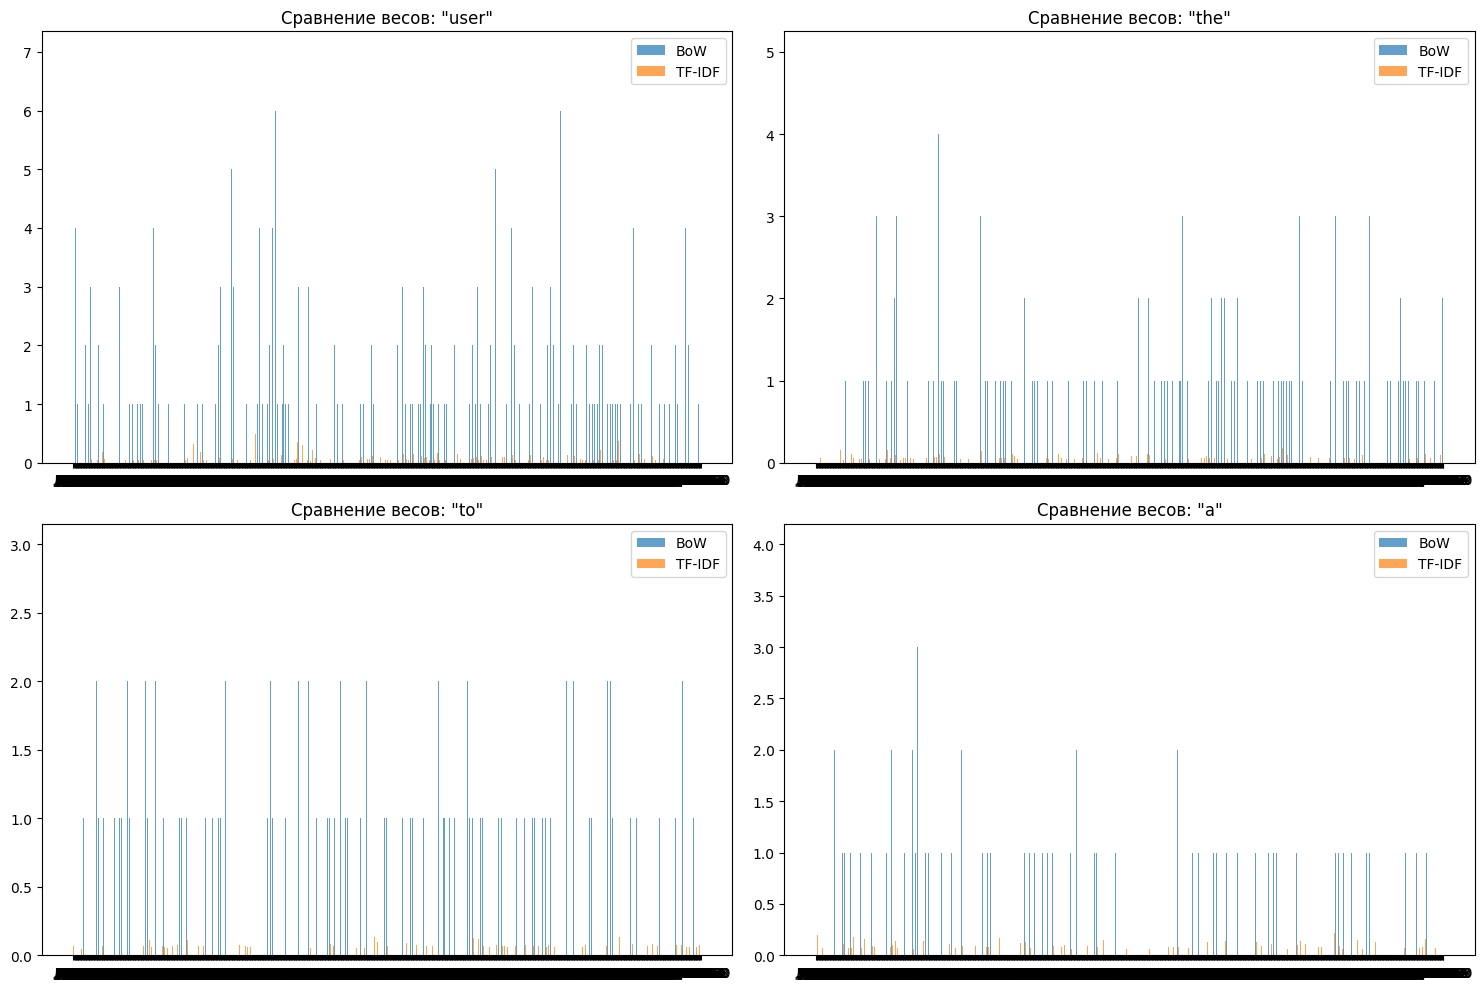


Топ-10 слов с наибольшим средним TF-IDF:
     word  mean_tfidf
38   user    1.255501
12    the    0.921131
14     to    0.719225
0       a    0.652104
25     of    0.587850
8      is    0.570534
80    for    0.553905
30    and    0.520487
116    in    0.519872
67      i    0.463558


In [23]:
# Сравните BoW и TF-IDF для конкретных слов
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        if word in dictionary.token2id:
            word_id = dictionary.token2id[word]

            # Веса для этого слова во всех документах
            bow_weights = [doc[word_id] for doc in bow_dense]
            tfidf_weights = [doc[word_id] for doc in tfidf_dense]

            x = range(len(bow_dense))
            axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
            axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
            axes[row, col].set_title(f'Сравнение весов: "{word}"')
            axes[row, col].legend()
            axes[row, col].set_xticks([p + 0.2 for p in x])
            axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
        else:
            axes[row, col].text(0.5, 0.5, f'Слово "{word}" не найдено',
                              ha='center', va='center', transform=axes[row, col].transAxes)
            axes[row, col].set_title(f'Слово "{word}" не в словаре')

    plt.tight_layout()
    plt.show()
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
top_words_for_comparison = word_freq_df.head(4)['word'].tolist()
print(f"Слова для сравнения: {top_words_for_comparison}")
# - Постройте графики сравнения их весов в BoW и TF-IDF
compare_bow_tfidf(top_words_for_comparison, dense_vectors, tfidf_dense, dictionary)
# Дополнительный анализ: сравнение самых важных слов по TF-IDF
print("\nТоп-10 слов с наибольшим средним TF-IDF:")
tfidf_mean = np.mean(tfidf_manual, axis=0)
important_words_df = pd.DataFrame({
    'word': words,
    'mean_tfidf': tfidf_mean
}).sort_values('mean_tfidf', ascending=False)

print(important_words_df.head(10))

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```